<a href="https://www.kaggle.com/code/bsrsrc/data-scientist-salaries-review?scriptVersionId=178621168" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
df["work_year"].unique()
df["experience_level"].unique()
df["salary_currency"].value_counts()

array([2023, 2022, 2020, 2021])

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [3]:
result = df.loc[df['salary_currency'] == 'TRY', 'salary_in_usd']
print(result) #🇹🇷

3597    12103
3624    20171
3634    28016
Name: salary_in_usd, dtype: int64


In [4]:
df = df.sort_values(by="salary_in_usd", ascending=False)
df.reset_index(drop=True)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
1,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
2,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
3,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
4,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
3751,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3752,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3753,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L


In [5]:
df = df.drop(["salary", "salary_currency"], axis=1)
df = df.reset_index(drop=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Research Scientist,450000,US,0,US,M
1,2022,MI,FT,Data Analyst,430967,GB,0,GB,M
2,2023,SE,FT,AI Scientist,423834,IL,0,IL,L
3,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
4,2021,EX,CT,Principal Data Scientist,416000,US,100,US,S


In [6]:
df["job_title"].nunique()

93

In [7]:
df.groupby("job_title").agg({"salary_in_usd": "median"}).sort_values(by="salary_in_usd", ascending=False)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.0
Cloud Data Architect,250000.0
Data Lead,212500.0
Data Analytics Lead,211254.5
Head of Data,202500.0
...,...
Product Data Analyst,20000.0
Staff Data Analyst,15000.0
3D Computer Vision Researcher,15000.0


In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Research Scientist,450000,US,0,US,M
1,2022,MI,FT,Data Analyst,430967,GB,0,GB,M
2,2023,SE,FT,AI Scientist,423834,IL,0,IL,L
3,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
4,2021,EX,CT,Principal Data Scientist,416000,US,100,US,S


In [9]:
if "employee_residence" in df.columns and "company_location" in df.columns:
    count_not_equal = sum(df["employee_residence"] != df["company_location"])
    print(max(count_not_equal, 1))
    

96


In [10]:
#ya da
df.loc[df['employee_residence'] != df['company_location']].shape

(96, 9)

In [11]:
#ya da
count_not_equal = df.apply(lambda row: row["employee_residence"] != row["company_location"], axis=1).sum()
print(max(count_not_equal, 1))

96


<Axes: xlabel='work_year'>

Text(0.5, 1.0, 'Salary by Years')

Text(0.5, 0, 'Work Year')

Text(0, 0.5, 'Salary in USD')

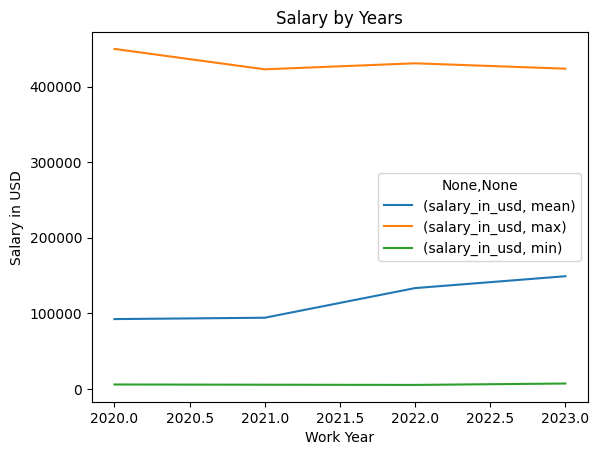

In [12]:
year_salary = df.groupby("work_year").agg({"salary_in_usd": ["mean", "max", "min"]}).astype(int)
year_salary.plot(kind="line")
plt.title("Salary by Years")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

<Axes: xlabel='experience_level'>

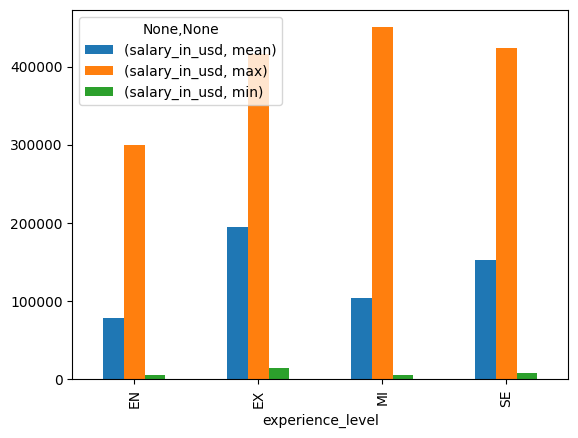

In [13]:
experience_salary = df.groupby("experience_level").agg({"salary_in_usd": ["mean", "max", "min"]})
experience_salary.plot(kind="bar")

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

Text(0.5, 1.0, 'Salary in USD by Experience Level')

Text(0.5, 0, 'Experience Level')

Text(0, 0.5, 'Salary in USD')

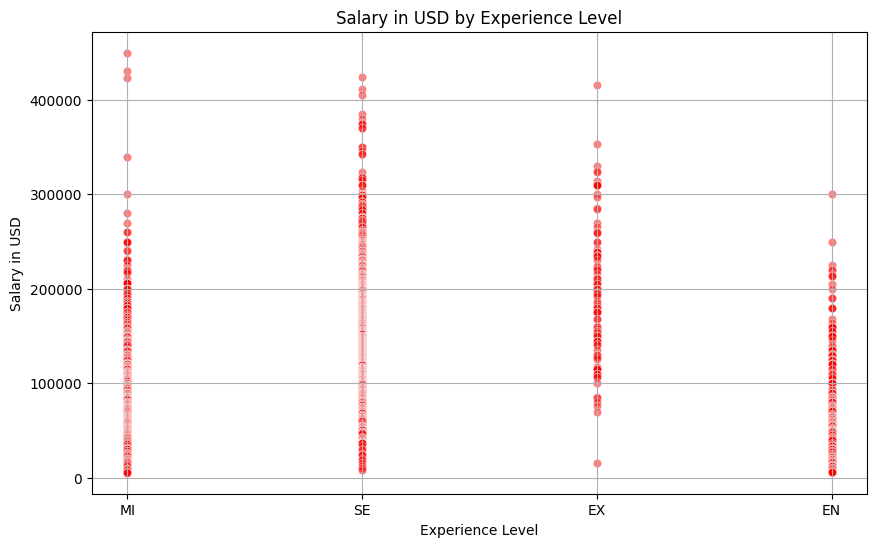

In [14]:
salary_in_usd = df["salary_in_usd"]
experience_level = df["experience_level"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=experience_level, y=salary_in_usd, color='red', alpha=0.5)
plt.title("Salary in USD by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()